Develop a program to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers. Use California Housing dataset. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
housing_data = fetch_california_housing(as_frame=True)
data = housing_data.frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

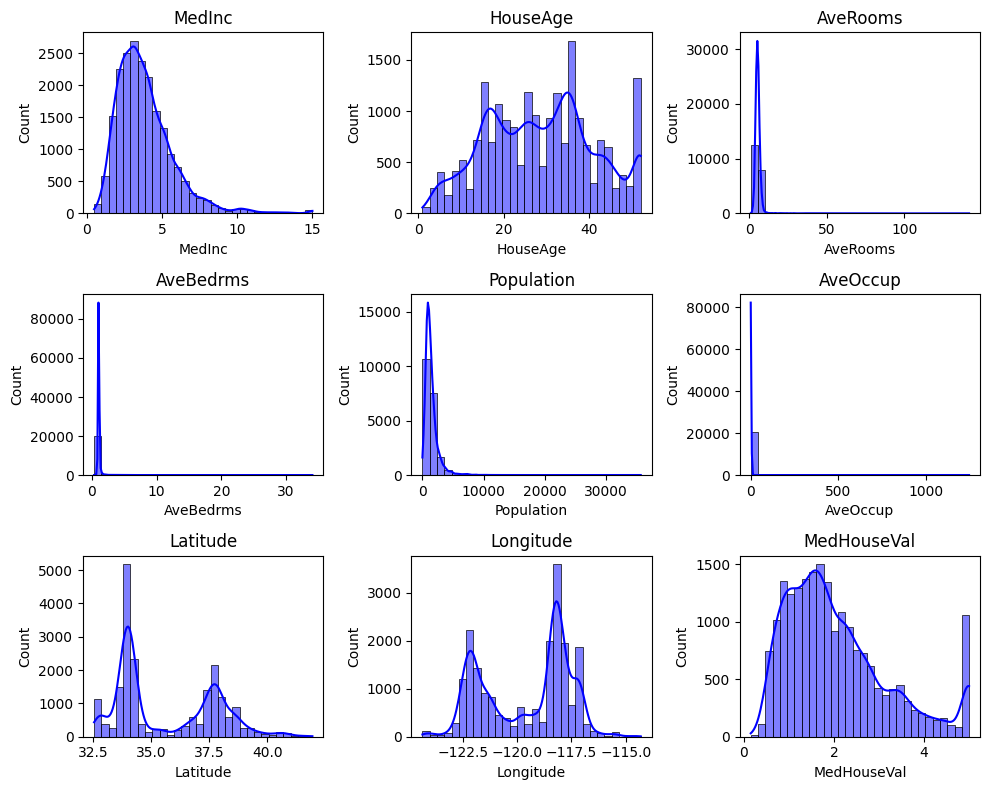

In [4]:
plt.figure(figsize=(10,8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot(data[feature], kde='True', bins=30, color='blue')
    plt.title(feature)
plt.tight_layout()
plt.show()

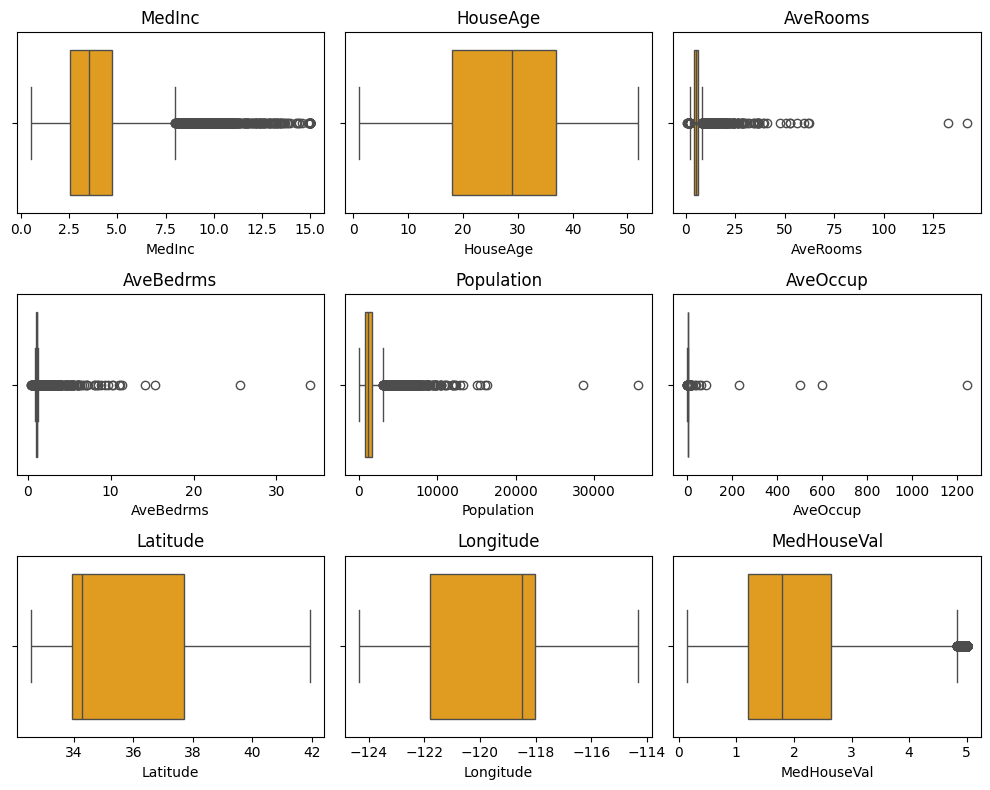

In [5]:
plt.figure(figsize=(10,8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[feature], color='orange')
    plt.title(feature)
plt.tight_layout()
plt.show()

In [6]:
print("outlier summary: ")
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bond = Q1 - 1.5 * IQR
    upper_bond = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bond) | (data[feature] > upper_bond)]
    print(f"{feature} -> {len(outliers)}")

outlier summary: 
MedInc -> 681
HouseAge -> 0
AveRooms -> 511
AveBedrms -> 1424
Population -> 1196
AveOccup -> 711
Latitude -> 0
Longitude -> 0
MedHouseVal -> 1071
